In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
# import matplotlib as mlp
# mlp.rcParams["axes.unicode_minus"] = False

from google.colab import drive
import glob

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 데이터 준비
df = pd.read_excel('/content/gdrive/MyDrive/공모전/data/노인의_우울증상_2.xlsx')
df.head()

,특성별(1),특성별(2),증상별(1),2011,2014,2017,2020
0,현 취업상태별,취업중,응답자수 (명),3566,2962.0,3117.0,3554.0
1,NaN,NaN,정상 (%),-,78.6,88.5,92.2
2,NaN,NaN,우울증상 (%),19.7,21.4,11.5,7.8
3,NaN,NaN,평균점수 (점),3.8,4.0,2.9,2.8
4,NaN,미취업,응답자수 (명),6974,7299.0,6956.0,6377.0


In [ ]:
df1 = df.loc[[3]]
df2 = df.loc[[7]]

In [ ]:
df1 = df1.transpose()[3:].transpose().reset_index(drop=True)
df2 = df2.transpose()[3:].transpose().reset_index(drop=True)

In [ ]:
a = df1.loc[0].values.astype(float)
a # 취업

array([3.8, 4. , 2.9, 2.8])

In [ ]:
b = df2.loc[0].values.astype(float)
b # 비취업

array([5.5, 6. , 4.6, 3.9])

In [ ]:
colors = sns.color_palette('Pastel1')
colors

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

Text(0.5, 1.0, '취업/비취업에 따른 우울 척도 점수 평균 분포')

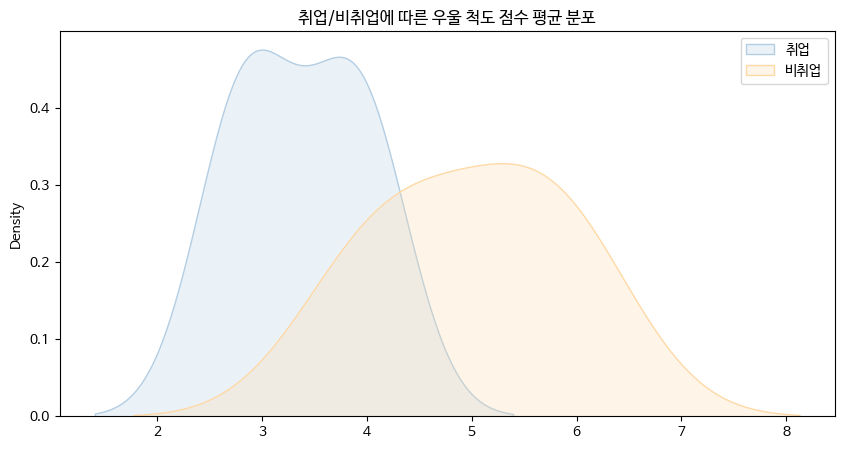

In [ ]:
plt.figure(figsize=(10, 5))

sns.kdeplot(a, shade=True, label='취업', color=colors[1])
sns.kdeplot(b, shade=True, label='비취업', color=colors[4])

plt.legend()
plt.title('취업/비취업에 따른 우울 척도 점수 평균 분포')

In [ ]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(b, a, alternative='two-sided')
print(f't-statics: {t_stat}, p-value: {p_val}')

t-statics: 2.907857818290685, p-value: 0.027055842625288515
